In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [3]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Definindo a loss function e o optimizer como stochastic gradient descent

In [4]:
model.compile(optimizer='sgd', loss='mean_squared_error')

Definindo um vetor X e Y, cuja relação é dada por:
$y = 2x - 1$

In [5]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [6]:
model.fit(xs, ys, epochs=500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 0s 31ms/sample - loss: 33.1452
Epoch 2/500
6/6 [==============================] - 0s 0s/sample - loss: 26.4035
Epoch 3/500
6/6 [==============================] - 0s 809us/sample - loss: 21.0928
Epoch 4/500
6/6 [==============================] - 0s 166us/sample - loss: 16.9080
Epoch 5/500
6/6 [==============================] - 0s 166us/sample - loss: 13.6092
Epoch 6/500
6/6 [==============================] - 0s 159us/sample - loss: 11.0075
Epoch 7/500
6/6 [==============================] - 0s 332us/sample - loss: 8.9545
Epoch 8/500
6/6 [==============================] - 0s 506us/sample - loss: 7.3332
Epoch 9/500
6/6 [==============================] - 0s 166us/sample - loss: 6.0518
Epoch 10/500
6/6 [==============================] - 0s 166us/sample - loss: 5.0378
Epoch 11/500
6/6 [==============================] - 0s 333us/sample - loss: 4.2344
Epoch 12/500
6/6 [==============================] - 0s 332us/sample - loss:

Testando o modelo com $x = 10$. O resultado esperado é 19, mas não vai ser exatamente isso.

In [7]:
model.predict([10.0])

array([[18.97859]], dtype=float32)

# Semana 2

using fashion mnist, a better dataset than the original mnist (but still quite simple).

In [9]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [12]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist

In [14]:
import matplotlib.pyplot as plt

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

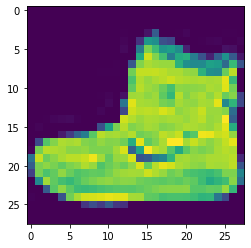

In [15]:
np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

Normalizing the data for 255 range

In [16]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Layers
 - **Flatten** -> Pega uma imagem 28x28 e transforma em um vetor 784x1. Melhor fazer isso que colocar 28 camadas de 28 neurônios (o que nem faz tanto sentido)
 - **Dense ReLU** -> ativa e desativa neurônios
 - **Dense Softmax** -> classifica o input por probabilidade nas classes disponíveis

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # input layer -> turns the image into a 1-D set
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # core activation function layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # softmax -> multiclass classification

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4985 - accuracy: 0.8236
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3752 - accuracy: 0.8653
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3369 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3122 - accuracy: 0.8866
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2947 - accuracy: 0.8916


In [20]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3575 - accuracy: 0.8676


[0.357509007537365, 0.8676]

In [22]:
classifications = model.predict(test_images)

Defining a callback for stop training when you reached a given accuracy (or any other metric desired)

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.2):
            print("\nReached <20% loss, so cancelling training!")
            self.model.stop_training = True

In [27]:
callbacks = myCallback()
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2681 - accuracy: 0.8998
Epoch 2/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2558 - accuracy: 0.9051
Epoch 3/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2471 - accuracy: 0.9072
Epoch 4/50
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2390 - accuracy: 0.9108
Epoch 5/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2330 - accuracy: 0.9131
Epoch 6/50
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2239 - accuracy: 0.9172
Epoch 7/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2178 - accuracy: 0.9179
Epoch 8/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2114 - accuracy: 0.9217
Epoch 9/50
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2048 - accuracy: 0.9241
Epoch 10/50
59